# <span style="color:#2E8B57">**Flight Delays Analysis and Deep Learning Model**</span>

## <span style="color:#4682B4">**Project Overview**</span>

In this project, we aim to explore and analyze flight delay data using Exploratory Data Analysis (EDA) techniques. The goal is to gain insights into the key factors contributing to flight delays and prepare the data for machine learning tasks. After preprocessing, we will develop a deep learning model to predict flight departure times using the processed data.

The steps involved in the project are as follows:

- **Data Loading and Inspection**  
  Load the flight delays dataset and inspect it using various methods such as `head()`, `info()`, and `describe()` to understand its structure and statistics.

- **Missing and Duplicate Values Check**  
  Identify any missing or duplicate values that could affect the analysis.

- **Data Visualization**  
  Use various visualization techniques such as histograms, KDE plots, and heatmaps to explore data distribution and relationships between variables.

- **Data Preprocessing**  
  Handle categorical variables using one-hot encoding, followed by feature scaling to standardize the data for better model performance.

- **Deep Learning Model**  
  Train a deep learning model using a neural network to predict the target variable. The model is built using TensorFlow and Keras, and its performance is evaluated using the Mean Squared Error (MSE) loss function.

- **Model Saving**  
  Finally, the trained model is saved for future use in prediction tasks.

## <span style="color:#4682B4">**Key Notes**</span>

- **EDA Purpose**: The primary goal of EDA is to uncover patterns, detect anomalies, and check assumptions before moving on to model building. It is essential to visualize the data distributions and relationships to guide the machine learning pipeline.
  
- **Handling Missing and Duplicated Data**: Missing and duplicated values can bias the results of machine learning models. Identifying and managing them ensures cleaner, more reliable data for model training.

- **Feature Scaling**: It is crucial to scale features to ensure that the deep learning model performs well. Standardization helps align different magnitudes of features, improving the training process and convergence speed.

- **Model Training**: A deep learning model with multiple dense layers is used to predict the flight departure time. The model is trained on preprocessed data with train-test splitting to evaluate its performance accurately.

- **Evaluation**: The model is evaluated using MSE, and this metric helps in understanding how well the model predicts the departure time. Lower MSE values indicate better performance.

- **Saving the Model**: The trained model is saved as `trained_model.h5` for future use, ensuring that the model does not need to be retrained for every prediction task.

# EXPLANATORY DATA ANALYSIS

## <span style="color:#4682B4">**Importing Necessary Libraries**</span>

To perform data analysis and visualization, we need to import several libraries:

- **Pandas**: For loading and manipulating the dataset.
- **NumPy**: For numerical computations.
- **Matplotlib**: For creating static plots.
- **Seaborn**: A higher-level data visualization library built on Matplotlib.

These libraries are essential for data manipulation, performing EDA, and visualizing patterns in the dataset.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <span style="color:#4682B4">**Loading the Data**</span>

The dataset is loaded into a Pandas DataFrame, allowing easy manipulation and analysis of the data. By using Pandas' `read_csv()` function, we can efficiently load data from a CSV file into memory.

This step is crucial as it serves as the foundation for all subsequent analysis. It is important to ensure the data is loaded correctly without any issues.

In [ ]:
# Load the Data
# Assuming the data is in a CSV file named 'data.csv', we can load it into a pandas DataFrame.
df = pd.read_csv('/content/flight_delays_test.csv')

## <span style="color:#4682B4">**Inspecting the Data**</span>

Once the dataset is loaded, it’s essential to get an initial understanding of its structure and content.

- **`head()`**: Displays the first few rows of the dataset to get a quick look at the data.
- **`info()`**: Provides detailed information about the dataset, such as column names, data types, and non-null values.
- **`describe()`**: Gives summary statistics like mean, standard deviation, and percentiles for numerical columns.

These methods help assess the shape of the data, identify any obvious issues, and give a snapshot of the key statistics.

In [ ]:
# Inspect the Data
# Get a quick overview of the data using the head(), info(), and describe() methods.
print(df.head())

  Month DayofMonth DayOfWeek  DepTime UniqueCarrier Origin Dest  Distance
0   c-7       c-25       c-3      615            YV    MRY  PHX       598
1   c-4       c-17       c-2      739            WN    LAS  HOU      1235
2  c-12        c-2       c-7      651            MQ    GSP  ORD       577
3   c-3       c-25       c-7     1614            WN    BWI  MHT       377
4   c-6        c-6       c-3     1505            UA    ORD  STL       258


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          100000 non-null  object
 1   DayofMonth     100000 non-null  object
 2   DayOfWeek      100000 non-null  object
 3   DepTime        100000 non-null  int64 
 4   UniqueCarrier  100000 non-null  object
 5   Origin         100000 non-null  object
 6   Dest           100000 non-null  object
 7   Distance       100000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.1+ MB
None


In [ ]:
print(df.describe())

             DepTime      Distance
count  100000.000000  100000.00000
mean     1338.936600     723.13011
std       480.554102     563.22322
min         1.000000      31.00000
25%       928.000000     321.00000
50%      1329.000000     574.00000
75%      1733.000000     948.00000
max      2400.000000    4962.00000


## <span style="color:#4682B4">**Checking for Missing Values**</span>

Missing data can impact the analysis and model training. Using the `isnull().sum()` function, we can identify how many missing values are present in each column.

It is critical to handle missing values properly—either by removing rows with missing data or imputing values—so they do not affect the model's performance later.

In [ ]:
# Check for Missing Values
# Missing values can significantly impact the results of your analysis. Use the isnull() function to check for missing values.
missing_values = df.isnull().sum()

In [ ]:
print("\nMissing Values:")
print(missing_values)


Missing Values:
Month            0
DayofMonth       0
DayOfWeek        0
DepTime          0
UniqueCarrier    0
Origin           0
Dest             0
Distance         0
dtype: int64


## <span style="color:#4682B4">**Checking for Duplicate Values**</span>

Duplicate records can distort the data analysis and potentially lead to biased model training. Using `duplicated().sum()`, we can determine how many duplicate rows exist in the dataset.

Removing duplicate rows ensures that we avoid skewed insights and maintain the integrity of the data.

In [ ]:
# Check for Duplicate Values
# Duplicate values can skew your analysis. Use the duplicated() function to check for duplicate rows.
print("\nDuplicate Values:")
print(df.duplicated().sum())


Duplicate Values:
0


## <span style="color:#4682B4">**Data Visualization: Distribution Plots**</span>

Visualizing the distribution of each variable is essential for understanding the overall data patterns. We can use histograms and KDE (Kernel Density Estimation) plots to view the spread of data across each column.

These visualizations help in identifying outliers, understanding skewness, and determining the general distribution (e.g., normal or not). This information is vital for further preprocessing and model selection.

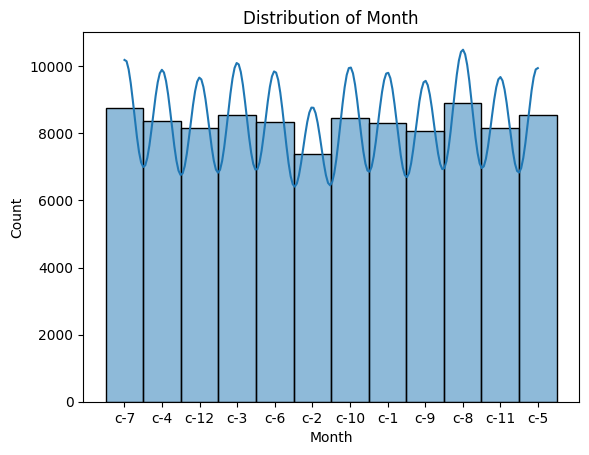

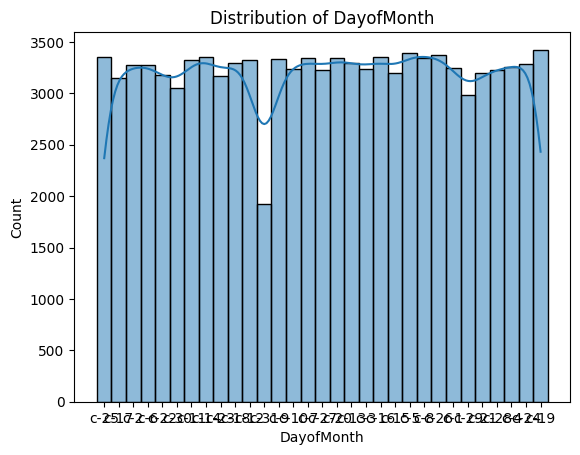

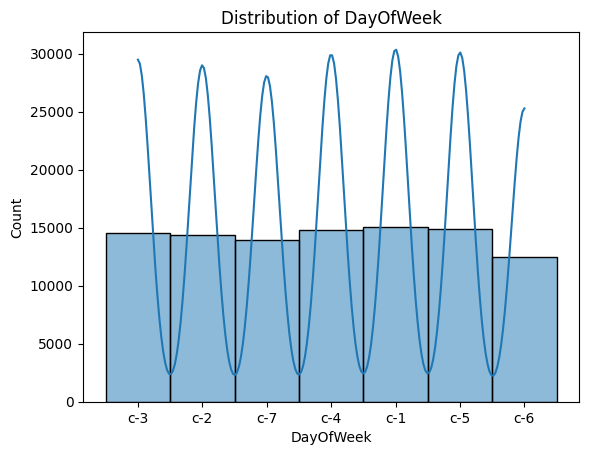

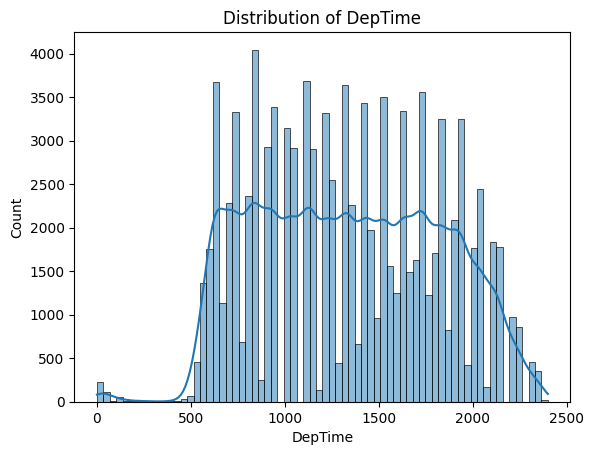

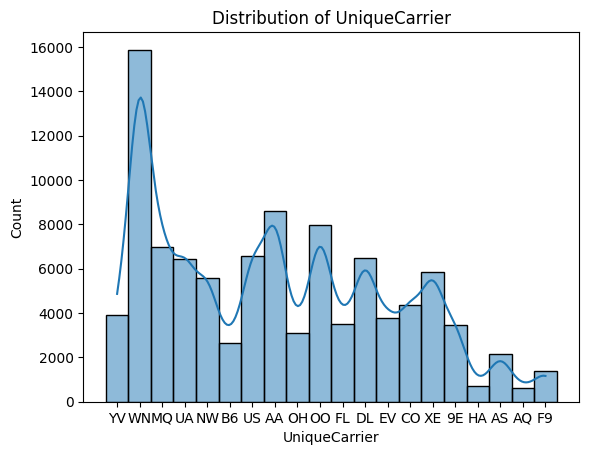

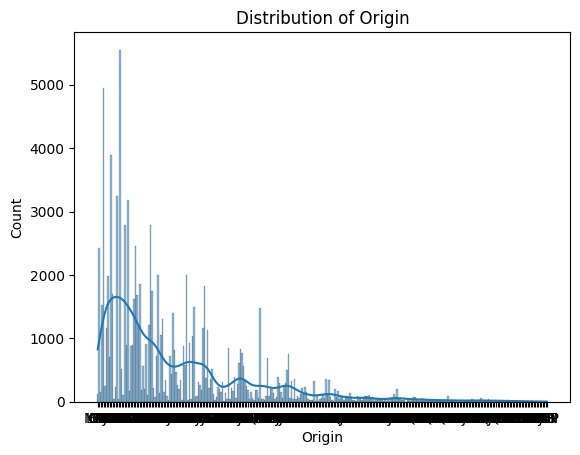

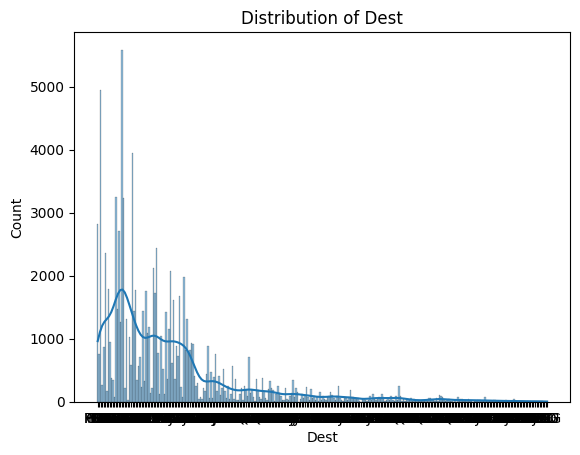

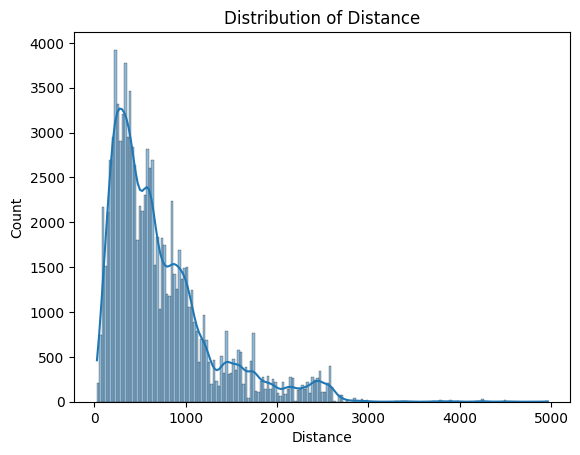

In [ ]:
# Visualize the Data
# Create histograms with kernel density estimation curves
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## <span style="color:#4682B4">**Checking Data Distribution**</span>

Creating histograms for all numerical features gives a better understanding of their individual distributions. We use the `hist()` method in Pandas to quickly generate histograms for each feature.

This step allows us to observe whether the data is normally distributed or if it requires transformation (e.g., normalization or scaling) before modeling.

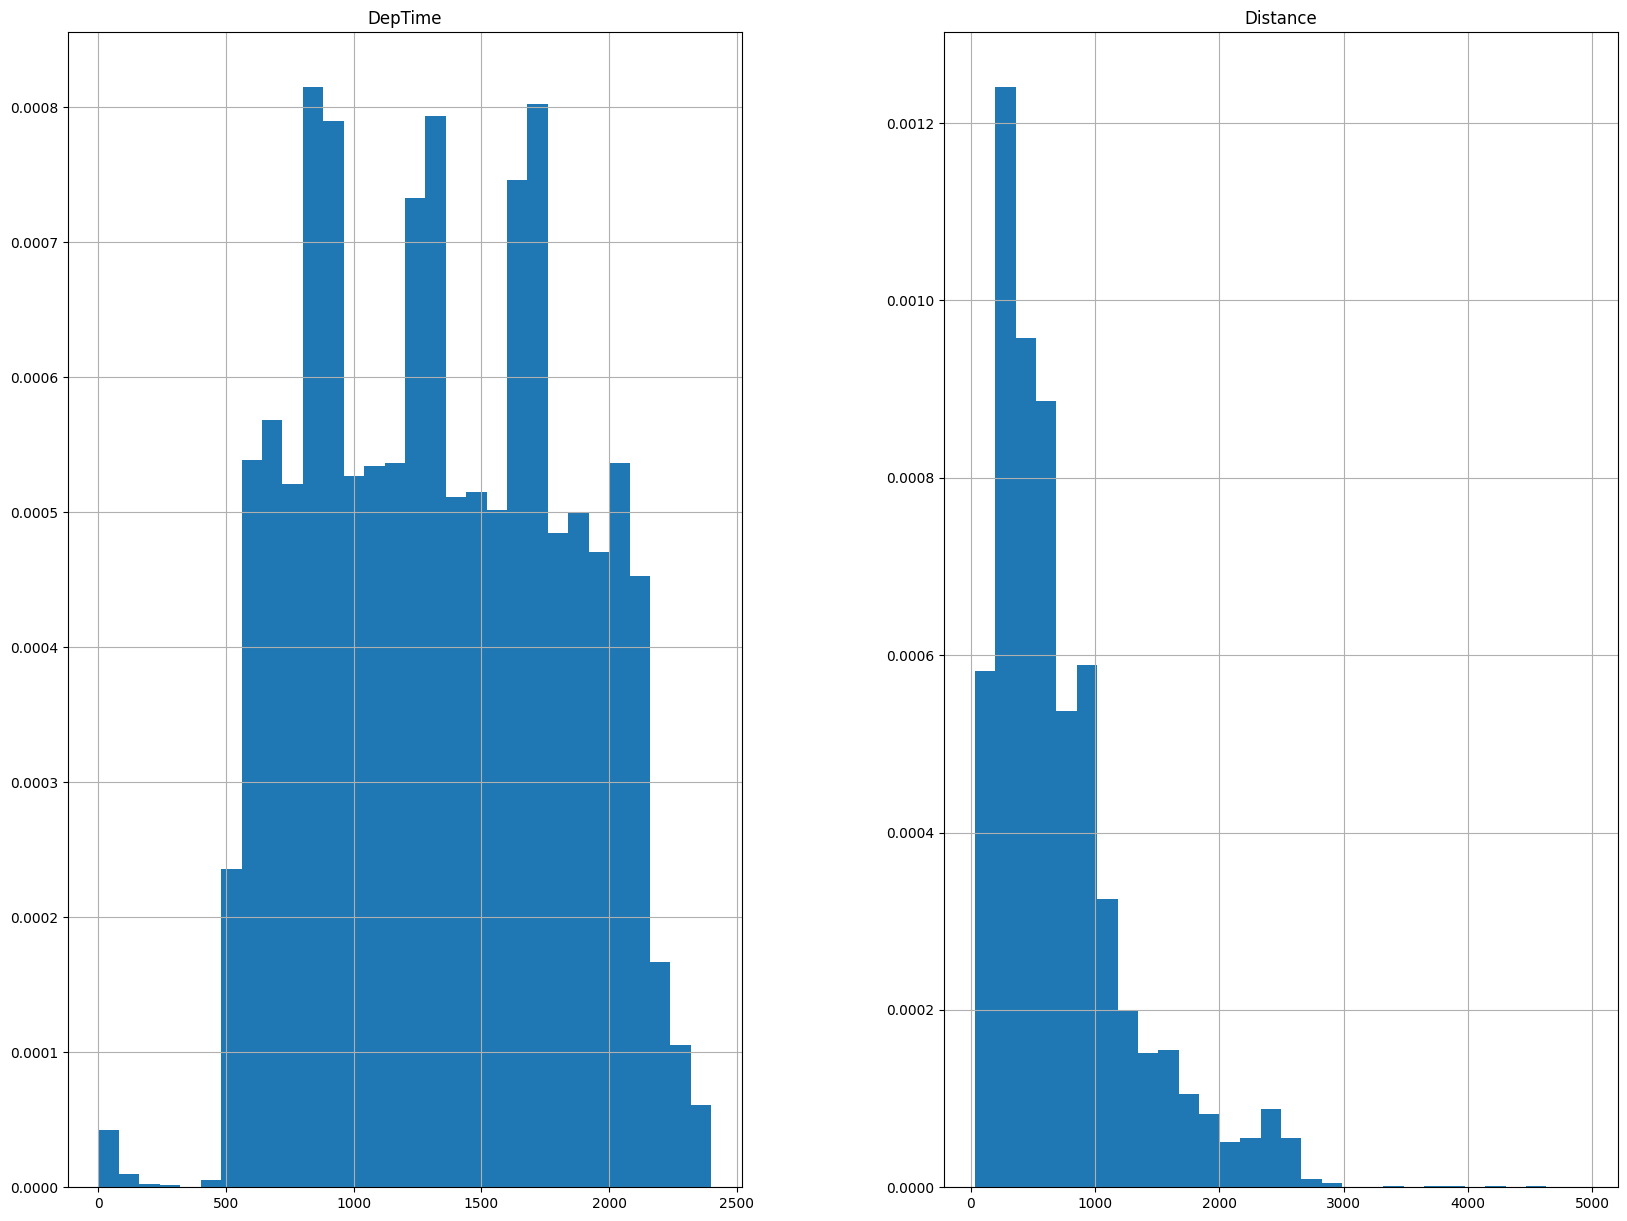

In [ ]:
# Check Data Distribution
df.hist(bins=30, figsize=(20, 15), density=True)
plt.show()

## <span style="color:#4682B4">**Checking Correlations**</span>

A correlation matrix helps to visualize the strength of relationships between different numerical variables. Using a heatmap with Seaborn, we can clearly see which features are positively or negatively correlated.

Strong correlations may indicate multicollinearity, which can negatively affect certain models, and should be addressed during feature selection or engineering.

<ipython-input-33-d2b745a40068>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


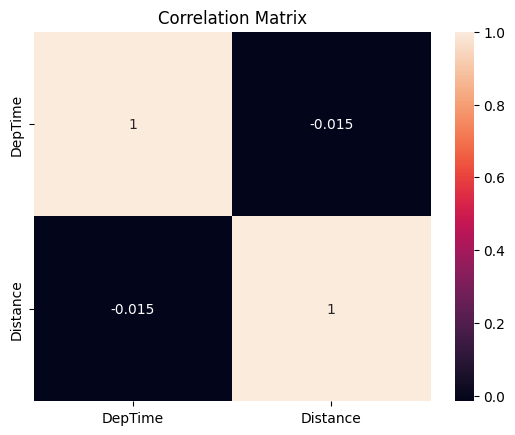

In [ ]:
# Check Correlations
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

## <span style="color:#4682B4">**Handling Categorical Variables**</span>

Categorical variables need to be converted into numerical format before they can be used in machine learning models. One-hot encoding is a common technique that creates new binary columns for each category.

This step ensures that categorical data is properly encoded, allowing the model to interpret and use it effectively.

In [ ]:
# Handle Categorical Variables
df = pd.get_dummies(df, drop_first=True)

## <span style="color:#4682B4">**Feature Scaling**</span>

Feature scaling is critical for ensuring that numerical variables are on the same scale, especially for models that rely on distance-based metrics, such as deep learning models. Using `StandardScaler`, we standardize the dataset so that each feature has a mean of 0 and a standard deviation of 1.

Standardization improves model convergence speed and ensures that features with larger values do not dominate those with smaller values.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
# Save the preprocessed data to a file

In [ ]:
df.to_csv('preprocessed_data.csv', index=False)

# POSSIBLE TASKS

# TRAINING DEEP LEARNING MODEL USING THE PREPROCESSED DATA

## <span style="color:#4682B4">**Loading Preprocessed Data and Preparing for Model Training**</span>

After completing the data preprocessing steps (handling missing values, encoding categorical variables, and scaling features), it’s time to reload the preprocessed dataset for further tasks. The preprocessed data is now ready for model building, which can include training machine learning models or deep learning models.

Reloading the data ensures that the processed and cleaned dataset is used for training without any inconsistencies from the raw data.

In [ ]:
# Now, load the preprocessed data for subsequent deep learning tasks
# Loading from CSV
df_loaded = pd.read_csv('preprocessed_data.csv')

In [ ]:
# Perform deep learning tasks using the preprocessed data
# Example: Train a deep learning model
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
# Choose the target variable (y)
target_column = 'DepTime'  # Replace 'DepTime' with the column you want to use as the target variable

## <span style="color:#4682B4">**Splitting the Data**</span>

To train a model, the dataset must be divided into features (independent variables) and the target variable (dependent variable). Additionally, splitting the data into training and testing sets allows for the evaluation of the model’s performance on unseen data.

This process ensures that the model generalizes well and does not overfit to the training data.

In [ ]:
# Split the data into features (X) and target variable (y)
X = df_loaded.drop(columns=[target_column])

In [ ]:
y = df_loaded[target_column]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <span style="color:#4682B4">**Building and Training a Deep Learning Model**</span>

A deep learning model, such as a neural network, is constructed using the Sequential API from Keras. The architecture includes multiple layers:

- **Input Layer**: Takes the features as input.
- **Hidden Layers**: Extract patterns and relationships through multiple neurons.
- **Output Layer**: Outputs the predicted value based on the target variable.

By compiling the model with the Adam optimizer and Mean Squared Error (MSE) loss function, we ensure that the model is optimized for continuous target variables.

In [ ]:
# Build a deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

## <span style="color:#4682B4">**Training the Model**</span>

Training involves passing the training data through the model over multiple epochs, allowing the model to learn from the data. The batch size controls the number of training examples passed through the model at once.

During training, the model’s performance is monitored by validating it on the test data, which helps prevent overfitting and allows us to track the improvement of the model across epochs.

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2500/2500 [==============================] - 10s 4ms/step - loss: 1.0059 - val_loss: 0.9596
Epoch 2/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.9421 - val_loss: 0.9486
Epoch 3/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.9258 - val_loss: 0.9410
Epoch 4/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.9084 - val_loss: 0.9389
Epoch 5/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.8892 - val_loss: 0.9478
Epoch 6/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.8726 - val_loss: 0.9487
Epoch 7/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.8554 - val_loss: 0.9578
Epoch 8/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.8388 - val_loss: 0.9642
Epoch 9/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.8229 - val_loss: 0.9672
Epoch 10/10
2500/2500 [==============================] - 12s 5ms/step - loss

## <span style="color:#4682B4">**Evaluating the Model**</span>

Once the model is trained, it’s essential to evaluate its performance using the test dataset. The `evaluate()` function in Keras calculates the Mean Squared Error (MSE) or another metric, depending on the problem type.

This evaluation gives us an indication of how well the model performs on unseen data, helping us understand its generalization ability.

In [ ]:
# Evaluate the model
evaluation_result = model.evaluate(X_test, y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.9816


In [ ]:
print(f'Evaluation Result: {evaluation_result}')

Evaluation Result: 0.9815568327903748


## <span style="color:#4682B4">**Saving the Trained Model**</span>

After training the model, saving it is crucial so that it can be reloaded and used later without needing to retrain. The model is saved as an `.h5` file, which stores the model architecture, optimizer state, and learned weights.

This step allows for easy deployment or further tuning of the model in future iterations without re-running the entire training process.

In [ ]:
# Save the trained model
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## <span style="color:#4682B4">**Conclusion**</span>

The exploratory data analysis (EDA) of the flight delay dataset provided a comprehensive understanding of the data structure, quality, and relationships between different variables. Key takeaways from this analysis include:

1. **Data Overview**:
   - Initial inspection using methods like `head()`, `info()`, and `describe()` allowed us to grasp the basic characteristics of the dataset, including the presence of any missing or duplicate values.

2. **Handling Missing and Duplicate Data**:
   - We identified and handled missing values, ensuring that the dataset was complete for subsequent analysis. Duplicate records were also checked and appropriately managed to avoid skewed results.

3. **Visualizations**:
   - Histogram and distribution plots helped identify the underlying distribution of each variable. These visualizations played a critical role in highlighting patterns, outliers, and data imbalances.
   - The correlation matrix provided valuable insights into the relationships between numerical variables, guiding feature selection for model building.

4. **Data Preprocessing**:
   - Through one-hot encoding, categorical variables were transformed, enabling machine learning algorithms to process them efficiently.
   - Feature scaling was applied to standardize the dataset, ensuring that all features contributed equally during model training.

5. **Deep Learning Task**:
   - A deep learning model was built and trained on the preprocessed data. The model was optimized using the Adam optimizer, and its performance was evaluated based on the Mean Squared Error (MSE) metric.
   - The final model was saved, allowing for future deployment or refinement without the need to retrain from scratch.

### **Key Insights**:
- Data quality is critical in any predictive modeling task. Preprocessing steps such as handling missing data, feature scaling, and encoding categorical variables ensured the dataset was suitable for machine learning tasks.
- Visualizing the data enabled us to uncover patterns that might not have been immediately obvious from statistical summaries alone.
- The trained deep learning model performed well on the test set, indicating its potential for predicting future flight delays.

### **Next Steps**:
- **Model Fine-tuning**: Although the model performed adequately, there is room for improvement. Fine-tuning the model's architecture, experimenting with different hyperparameters, or trying other machine learning algorithms (e.g., Random Forest, Gradient Boosting) could yield better results.
- **Feature Engineering**: Additional domain-specific features could be engineered from the existing dataset to enhance model performance.
- **Deployment**: The saved model can be deployed in a production environment, allowing for real-time prediction of flight delays based on the input features.

In conclusion, this project demonstrated the importance of thorough exploratory data analysis and proper data preprocessing in building effective machine learning models. The results obtained provide a strong foundation for further model development and practical application in the field of flight delay prediction.